# Série TP 6 - Fouille de Données - SVM - Support Vector Machines

https://scikit-learn.org/stable/modules/svm.html#svm-kernels

## Imports

In [32]:
import numpy as np
import pandas as pd
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

## Dataset

In [2]:
X = np.array([[3,4], [1,4], [2,3], [6,-1], [7,-1], [5,-3]])
y = np.array([-1, -1, -1, 1, 1 , 1])

## Model & training : Linear SVC

In [3]:
clf = SVC(kernel = 'linear', C=1000)
clf.fit(X, y) 

SVC(C=1000, kernel='linear')

## Printing hyper parameter values

In [4]:
print('w = ', clf.coef_)

w =  [[ 0.25 -0.25]]


In [5]:
print('w1 = ', clf.coef_[0][0])

w1 =  0.25


In [6]:
print('w2 = ', clf.coef_[0][1])

w2 =  -0.25


In [7]:
print('b = ',clf.intercept_[0])

b =  -0.75


In [8]:
print('Support vectors = ', clf.support_vectors_)

Support vectors =  [[ 2.  3.]
 [ 6. -1.]]


In [9]:
print('Number of support vectors for each class = ', clf.n_support_)

Number of support vectors for each class =  [1 1]


In [10]:
print('Coefficients of the support vector in the decision function = ', np.abs(clf.dual_coef_))

Coefficients of the support vector in the decision function =  [[0.0625 0.0625]]


## Prediction using decison function H(X)

In [11]:
# Calculating the value of decision function H(x = (2, 5))= W.X + b = [(0.25 -0.25) . (2, 5)] + -0.75
print(clf.decision_function([[2, 5]]))

[-1.5]


In [12]:
# Which is equivalet to : [(0.25 -0.25) . (2, 5)] + -0.75
w_ = np.array([0.25, -0.25]) 
x_ = np.array([2,5]) 
b_ = -0.75
print(np.dot(w_,x_) + b_)

-1.5


In [13]:
# Predict class of X = (2, 5) : H(x) = -1.5 < 0
print(clf.predict([[2, 5]]))

[-1]


In [14]:
# Predict class of X = (5, -3) : H(x) = 1.25 > 0 
print(clf.decision_function([[5, -3]]))
print(clf.predict([[5, -3]]))

[1.25]
[1]


### Hyperplane (line) points

In [15]:
w = clf.coef_[0]

In [16]:
b = clf.intercept_[0]

In [17]:
x_points = np.linspace(0, 6, 6)

In [18]:
x_points

array([0. , 1.2, 2.4, 3.6, 4.8, 6. ])

In [19]:
y_points = -(w[0] / w[1]) * x_points - b / w[1]

In [20]:
y_points

array([-3. , -1.8, -0.6,  0.6,  1.8,  3. ])

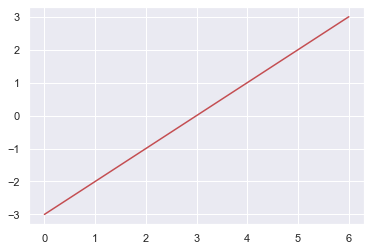

In [33]:
plt.plot(x_points, y_points, c='r')
plt.show()

### Margin

In [22]:
w_norm = np.sqrt(np.sum(w ** 2))

In [23]:
w_norm

0.3535533905932738

In [24]:
margin = 2 / w_norm

In [25]:
margin

5.65685424949238

## Plotting the hyperplane & support vectors

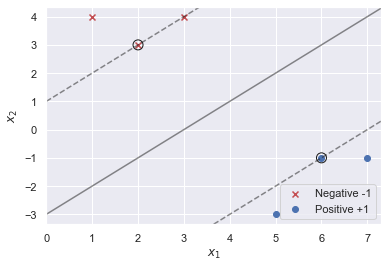

In [34]:
# Plot datapoints
plt.scatter(X[:3,0], X[:3,1], marker = 'x', color = 'r', label = 'Negative -1')
plt.scatter(X[3:,0], X[3:,1], marker = 'o', color = 'b',label = 'Positive +1')

# plot the decision function
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# create grid to evaluate model
xx = np.linspace(0, xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T

Z = clf.decision_function(xy).reshape(XX.shape)

# plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# plot support vectors
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k')

#Labels, legend, and show
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend(loc = 'lower right')

plt.show()

## Model evaluation on test set

In [27]:
X_test = [[0,4], [4, 0], [3,4], [3,5], [3, 1]]
y_test = [-1, 1, -1, -1, 1]

In [28]:
clf.score(X_test, y_test)

0.8

In [29]:
y_pred = clf.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8


In [30]:
print(y_test)
print(y_pred)

[-1, 1, -1, -1, 1]
[-1  1 -1 -1 -1]


In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.75      1.00      0.86         3
           1       1.00      0.50      0.67         2

    accuracy                           0.80         5
   macro avg       0.88      0.75      0.76         5
weighted avg       0.85      0.80      0.78         5



X = np.array([[1,0],[0,1],[0,-1],[-1,0],
             [3,-1],[3,1], [6,2], [6,-2]])
y = np.array([-1,-1, -1, -1, 1, 1, 1, 1])